In [22]:
import pandas as pd
from pyjarowinkler import distance

Матчінг після фільтрації по мовам, мерджингу з фільтруванням по спільним словам/кодам

In [23]:
df = pd.read_csv('result_data.csv')

In [24]:
df.head()

,TIN,FULL_NAME,json_id,name,ogrnCode,innCode,sanctions,related_to,same_code,same_name,redused_full_name,redused_json_name
0,376372,барський спиртовий,NK-77BJ8UbfBduQzXWhrx2KvK,федеральне унітарне гірничо-хімічний,['1022401404871'],['2452000401'],[{'id': 'ua-nazk-7767172472f1f2a643f5ac13906b6...,NaN,False,True,барський спиртовий,федеральне унітарне гірничо-хімічний
1,376372,барський спиртовий,NK-CadUMN6nMs9t56nuQE7YCk,федеральне унітарне електрохімприлад,['1026601766950'],['6630002336'],[{'id': 'ua-nazk-8a07b1dff5a6e05762b22c4639dda...,NaN,False,True,барський спиртовий,федеральне унітарне електрохімприлад
2,376372,барський спиртовий комбінат,NK-P2q7vwBofBCY2VP5MoTcmJ,так зване зв'язку унітарне донецької народ...,['N/A'],NaN,[{'id': 'ua-nazk-66fe74ac5b23e466f77f2fae6021e...,NaN,False,True,барський спиртовий комбінат,так зване зв'язку унітарне донецької народ...
3,376372,барський спиртовий комбінат,NK-R58MnnJo2WdbGCNxnMwsGj,федеральне унітарне науково-виробниче гамма,['1027739443830'],['7728044373'],[{'id': 'ca-sema-2f16a2d0917622c6608b6aba40439...,NaN,False,True,барський спиртовий комбінат,федеральне унітарне науково-виробниче гамма
4,376372,барський спиртовий комбінат,NK-TrLccKcfToTWKaN7gHmtpg,федеральне унітарне дослідний завод вега доч...,['1024000537571'],['4003005290'],[{'id': 'ch-seco-9e37b7b8970ee6c99eac36993f8b2...,NaN,False,True,барський спиртовий комбінат,федеральне унітарне дослідний завод вега доч...


Перевіряю чи взагалі є однакові коди
Для цього піднабору - жодного(((

In [25]:
df[['same_code', 'same_name']].value_counts()

same_code  same_name
False      True         100001
Name: count, dtype: int64

In [27]:
df[['FULL_NAME', 'name']].isna().any()

FULL_NAME    False
name         False
dtype: bool

In [33]:
df['FULL_NAME'] = df['FULL_NAME'].astype(str)
df['name'] = df['name'].astype(str)

Тест системи

In [48]:
df['distance'] = df.apply(lambda x : distance.get_jaro_distance(str(x.redused_full_name), str(x.redused_json_name)), axis = 1)

In [49]:
df.distance.describe()

count    100001.000000
mean          0.690960
std           0.132225
min           0.000000
25%           0.680000
50%           0.720000
75%           0.750000
max           0.920000
Name: distance, dtype: float64

In [50]:
df.head()

,TIN,FULL_NAME,json_id,name,ogrnCode,innCode,sanctions,related_to,same_code,same_name,redused_full_name,redused_json_name,distance
0,376372,барський спиртовий,NK-77BJ8UbfBduQzXWhrx2KvK,федеральне унітарне гірничо-хімічний,['1022401404871'],['2452000401'],[{'id': 'ua-nazk-7767172472f1f2a643f5ac13906b6...,NaN,False,True,барський спиртовий,федеральне унітарне гірничо-хімічний,0.39
1,376372,барський спиртовий,NK-CadUMN6nMs9t56nuQE7YCk,федеральне унітарне електрохімприлад,['1026601766950'],['6630002336'],[{'id': 'ua-nazk-8a07b1dff5a6e05762b22c4639dda...,NaN,False,True,барський спиртовий,федеральне унітарне електрохімприлад,0.38
2,376372,барський спиртовий комбінат,NK-P2q7vwBofBCY2VP5MoTcmJ,так зване зв'язку унітарне донецької народ...,['N/A'],NaN,[{'id': 'ua-nazk-66fe74ac5b23e466f77f2fae6021e...,NaN,False,True,барський спиртовий комбінат,так зване зв'язку унітарне донецької народ...,0.45
3,376372,барський спиртовий комбінат,NK-R58MnnJo2WdbGCNxnMwsGj,федеральне унітарне науково-виробниче гамма,['1027739443830'],['7728044373'],[{'id': 'ca-sema-2f16a2d0917622c6608b6aba40439...,NaN,False,True,барський спиртовий комбінат,федеральне унітарне науково-виробниче гамма,0.49
4,376372,барський спиртовий комбінат,NK-TrLccKcfToTWKaN7gHmtpg,федеральне унітарне дослідний завод вега доч...,['1024000537571'],['4003005290'],[{'id': 'ch-seco-9e37b7b8970ee6c99eac36993f8b2...,NaN,False,True,барський спиртовий комбінат,федеральне унітарне дослідний завод вега доч...,0.40


In [58]:
df.sort_values(by = 'distance', ascending = False).head(5)

,TIN,FULL_NAME,json_id,name,ogrnCode,innCode,sanctions,related_to,same_code,same_name,redused_full_name,redused_json_name,distance
21026,5466772,відповідальністю будматеріали,NK-2pSJdL4VFrnMFzYWmYYLCL,відповідальністюдубрава,['1024700555440'],['4703056519'],[{'id': 'ua-nazk-42284cb6c32fd9c128204b684ad79...,NaN,False,True,будматеріали,дубрава,0.92
65521,13331945,відповідальністю одчий,NK-hsJwRQpMv7WUSMvzka4yD7,відповідальністюарако,['1117847369122'],['7817323763'],[{'id': 'ua-nazk-1afe833ea06ed62adafa80e8f78be...,NaN,False,True,одчий,арако,0.92
21368,5466772,відповідальністю будматеріали,NK-7nyTNZQ4zTBxNX3VZCGGcT,відповідальністютрадиція,['1037804026611'],['7802160805'],[{'id': 'ua-nazk-fc323817ca97b8709d9ba97add935...,NaN,False,True,будматеріали,традиція,0.91
72600,31086753,вiдповiдальнiстю агат-а,NK-CEK2aTc9ryrCCwMPncfwSF,відповідальністюагат-а,['1227800110856'],['7841100180'],[{'id': 'ua-nazk-4f4a8e01cb018adc888f0a372dbef...,NaN,False,True,вiдповiдальнiстю агат-а,агат-а,0.91
22173,5466772,відповідальністю будматеріали,NK-KMRDn27sSSaojSe4nREx5w,відповідальніст негабаритика,['1133116000270'],['3116006409'],[{'id': 'ua-nazk-186909d91f55879cd8756cde29cf7...,NaN,False,True,будматеріали,негабаритика,0.91


Не втішний, надто багато шуму, в топі найкращої відстані, немає толком метчів(за винятком агат-а)

Вирішив почистити "відповідальністю", бо бачу, що з якихось причин вона збереглась в багатьох записах.
Можливо через різні кодування/символи

In [75]:
df['redused_json_name'] = df['redused_json_name'].astype(str)
df['redused_full_name'] = df['redused_full_name'].astype(str)

In [76]:
df['redused_json_name'] = df['redused_json_name'].str.replace('відповідальністю', '')
df['redused_json_name'] = df['redused_json_name'].str.replace('відповідальніст', '')

df['redused_full_name'] = df['redused_full_name'].str.replace('відповідальністю', '')
df['redused_full_name'] = df['redused_full_name'].str.replace('відповідальніст', '')

In [77]:
def calc_dist(str1, str2):
    if(len(str1) == 0):
        str1 = 's'
    if(len(str2) == 0):
        str2 = 's'
    return distance.get_jaro_distance(str1, str2)

In [78]:
df['distance'] = df.apply(lambda x : calc_dist(str(x.redused_full_name), str(x.redused_json_name)), axis = 1)

In [79]:
df.sort_values(by = 'distance', ascending = False)

,TIN,FULL_NAME,json_id,name,ogrnCode,innCode,sanctions,related_to,same_code,same_name,redused_full_name,redused_json_name,distance
6010,34244416,вiдповiдальнiстю пфаннер агро,NK-oUHjoxn7Zk6vRFwzrG7X7h,відпоідальністю сохра груп,['192363182'],NaN,[{'id': 'be-fod-c75de2d844fc56a21340896f408653...,NaN,False,True,вiдповiдальнiстю пфаннер агро,відпоідальністю сохра груп,0.81
23899,5466772,будматеріали,NK-ndGcLhdEwuc66GU2dScrrM,будсервис,['1172375020234'],['2352053960'],[{'id': 'ua-nazk-d2766d46c8ef17bed8ff43ad9f018...,NaN,False,True,будматеріали,будсервис,0.81
21501,5466772,товариство будматеріали,NK-9Zzvya86wceNdL3qrdsZuH,твариство сампоерна,['43732520'],NaN,[{'id': 'ua-nazk-7c3ec315440507a0c8112ef187cd0...,NaN,False,True,товариство будматеріали,твариство сампоерна,0.80
43833,33543380,обмеженою вiдповiдальнiстю правнича справа,NK-W5usohSWk2RNwsyup5JbRb,обмеженоювідповідальністю перша міжнароднабукм...,['1087746968759'],['7729607406'],[{'id': 'ua-nazk-84270d486066a3c2a4aad9d8e4e7e...,NaN,False,True,обмеженою вiдповiдальнiстю правнича справа,обмеженою перша міжнароднабукмекерська,0.79
64326,13331945,обмеженою одчий,NK-P3qArVxXnsSpFc9Furmfps,обмежувальною суднохідне агентство транс-флот,['1073703000975'],['3703039938'],[{'id': 'ua-nazk-7d0a51ff578de86769e506b67aa35...,NaN,False,True,обмеженою одчий,обмежувальною суднохідне агентство транс-флот,0.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15170,42954704,вiдповiдальнiстю агро-ровиток,NK-4akjxfj4WVbHDeNUhs4bAg,відповідальністю агат,['1027804189830'],['7804051110'],[{'id': 'ua-nazk-56b6ae821f3a0260edb03e6cb044a...,NaN,False,True,вiдповiдальнiстю агро-ровиток,агат,0.00
15172,42954704,вiдповiдальнiстю агро-ровиток,NK-4dAFwiGv5fVPFNzVjWhfaW,відповідальністю ''1ss і к'',['1027739885557'],['7705012512'],[{'id': 'ua-nazk-264543cf36cca90da1e9713f1915d...,NaN,False,True,вiдповiдальнiстю агро-ровиток,''100 і к'',0.00
47039,33623240,вiдповiдальнiстю флоріан-т,NK-ZSbg3MyadjHaDdAtpuNSWT,відповідальністю атм груп,['1085029001309'],['5029111665'],[{'id': 'ua-nazk-2dfda32c19b48f0f10bf5f1a11f4a...,NaN,False,True,вiдповiдальнiстю флоріан-т,атм груп,0.00
76238,33781896,вiдповiдальнiстю торговий дім інтеркорн,NK-NAFYhnUkAkjmw33RzTy3k8,відповідальністю тк,['1187847101529'],['7804618544'],[{'id': 'ua-nazk-0ba64615ccf4b94ed3fe5b57ac87b...,NaN,False,True,вiдповiдальнiстю торговий дім інтеркорн,тк,0.00


Результат все ще не втішний

Більше того, чомусь "відповідальністю" толком не почистилось, що ще раз підштовхує до думки про формати символів чи стрічок, певні невідповідності у символах тощо

Більше того є явні опечатки в даних(наприклад твариство, а не товариство)

Ідеї для покращення результату:
* замерджити більше даних і поглянути який результат буде там(все таки один мердж був і потрібно більше аналітики)
* розібратись чому чимало слів не були видалені, можливо проблема полягає тут(якщо причина в іншому можна спробувати додатково видалити частотні слова)
* спробувати vectorizer через n-gram'и для складів(скажемо по 2 чи 3 символи) і поверх цього cos sim - в теорії, якщо унікальних складів не надто багато, може працювати навіть швидше, ніж JaroWinker через оптимізацію sklearn та numpy замість чистої реалізації відстані на Python, також ця реалізація мала б непогано справлятися з неточностями і опечатками
* селекція в назвах, де це можливо по " - це дасть тільки назву, якщо вони є

Можлива проблема:

число - кількість однакових слів

перша стрічка - з json

друга - з csv
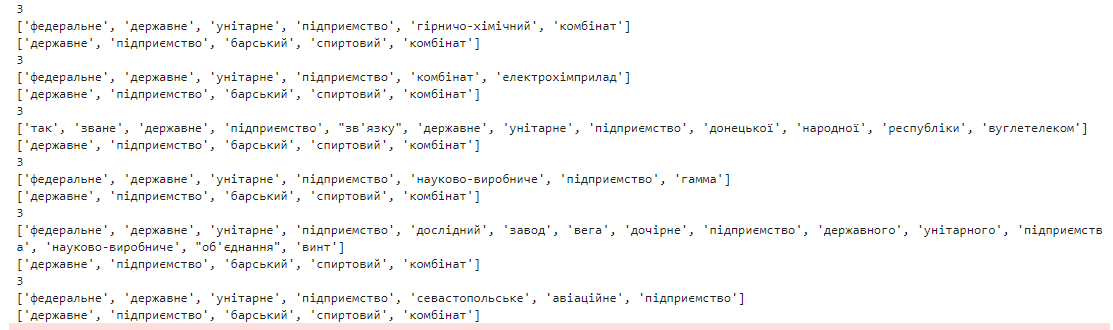

* Відповідно кращий шлях для оптимізації - це видалення частотних слів